In [ ]:
# pip install reportlab
# pip install tdt
# pip install opencv-python

### 1. FP data preprocessing

In [1]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function
import ReportGeneration # import User-defined function
import VideoFunctions # import User-defined function

In [2]:
Raw_data_path =  r'D:\DataAtCSBD\FiberPhotometry\TDT_Tank' #The folder where the TDT tanks are saved
Recorded_date = '250224_B6' #The date of the recording
# Data_folder_path = 'G06_005-250114-150521' #The original folder name generated by TDT Synapse

Base_folder = r'D:\DataAtCSBD\FiberPhotometry\ProcessedData' #The folder where the processed data will be saved
Batch_folder = '250224_B6' 
# Animal_ID = 'B6_M_G06_005'
# Session = 'HA'

In [3]:
Datafolder_list = ['G10_002-250224-171709', 'G10_004-250224-162553']
Animal_ID_list = ['B6_G10_002', 'B6_G10_004']
print(Animal_ID_list)
session_list = ['PI']

['B6_G10_002', 'B6_G10_004']


Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_002\PI\Preprocessing already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_002\PI\Preprocessing.
read from t=0s to t=2543.76s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250224_B6\G10_002-250224-171709


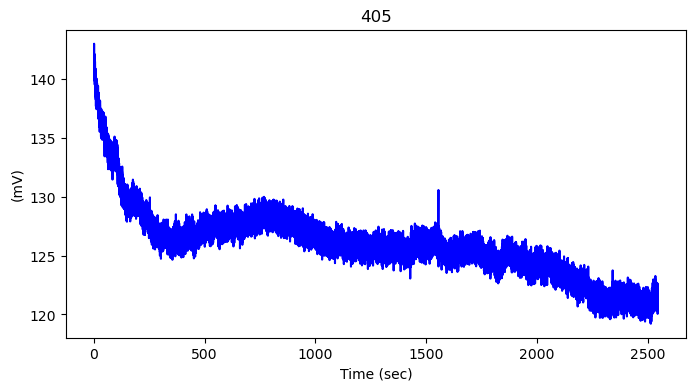

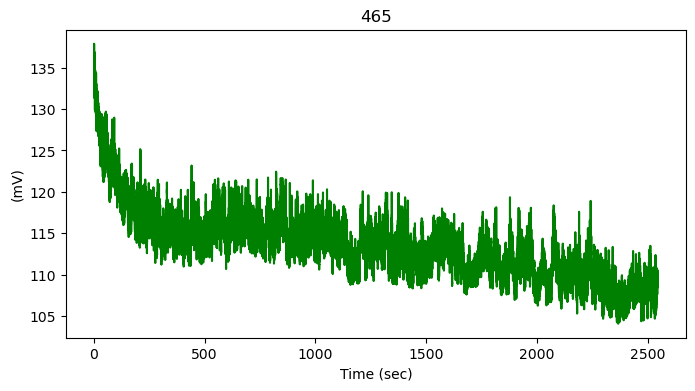

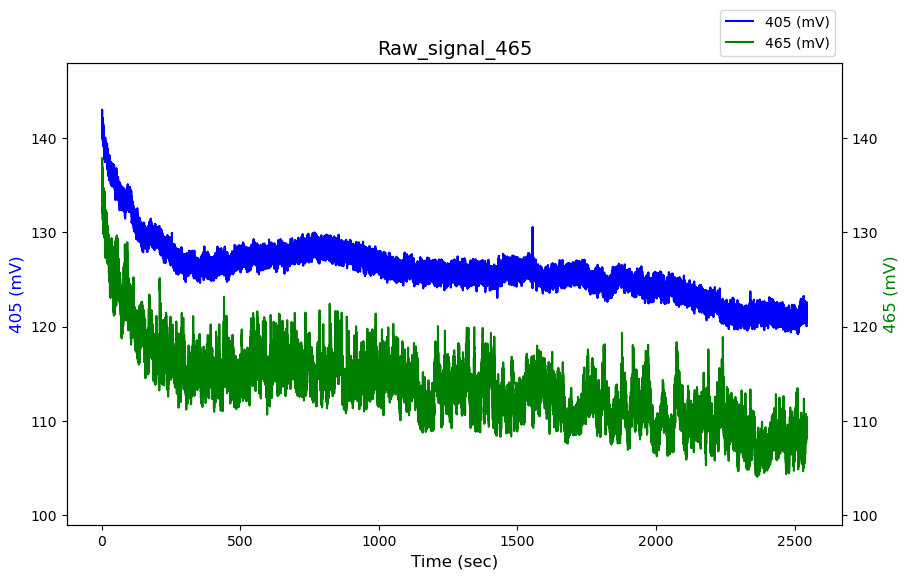

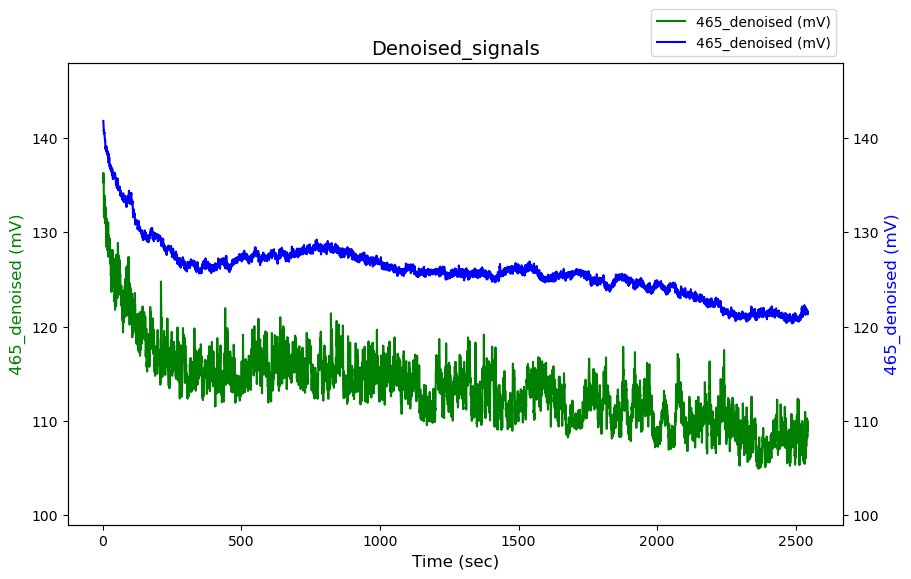

Slope    : 0.392
R-squared: 0.040


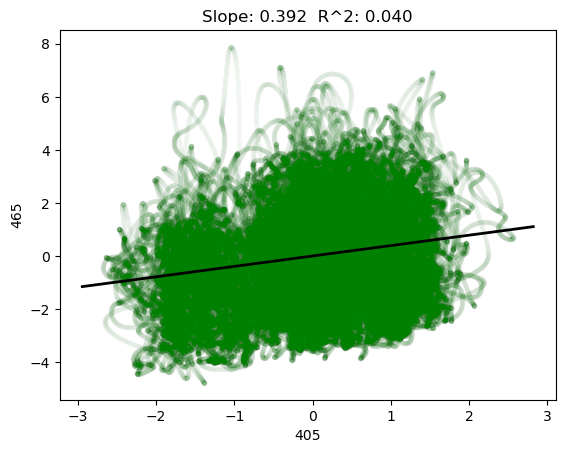

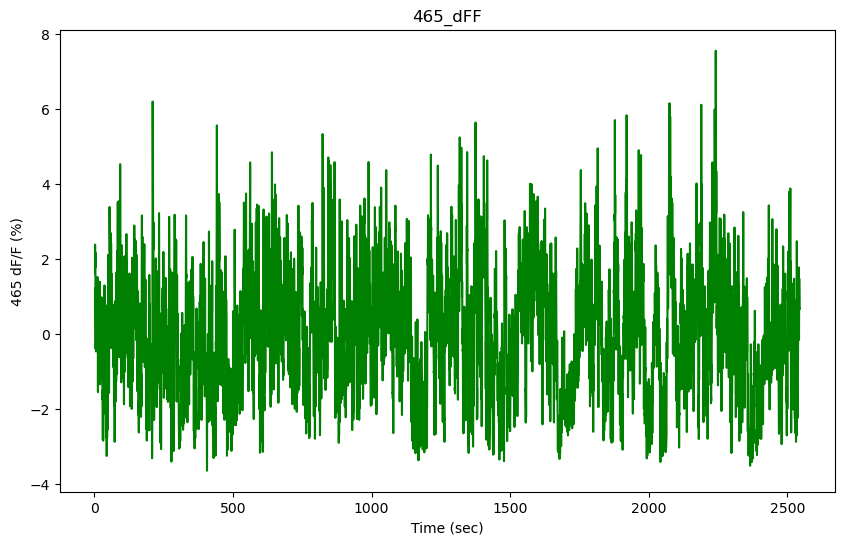

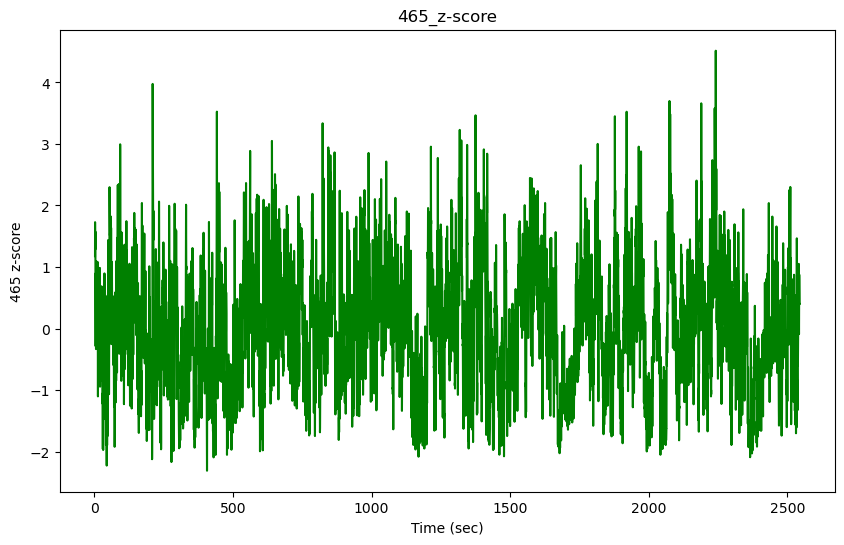

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_004\PI\Preprocessing created.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_004\PI\Preprocessing.
read from t=0s to t=2811.46s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250224_B6\G10_004-250224-162553


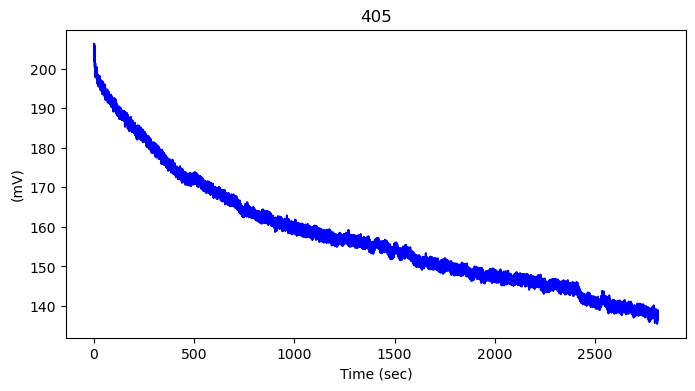

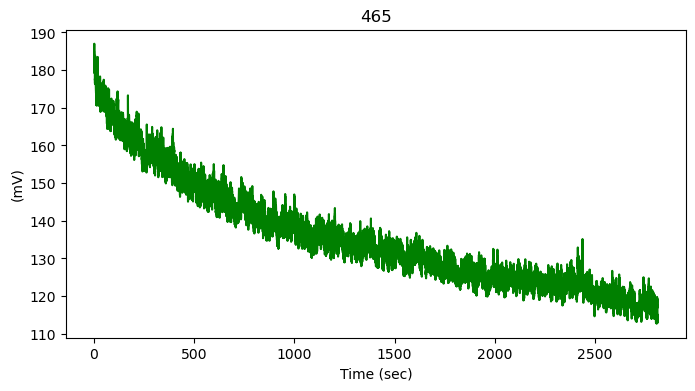

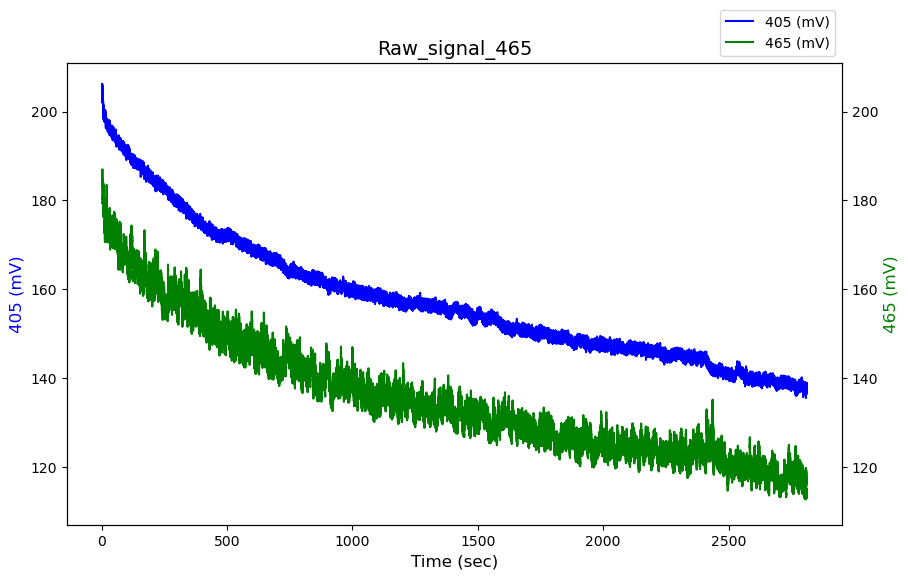

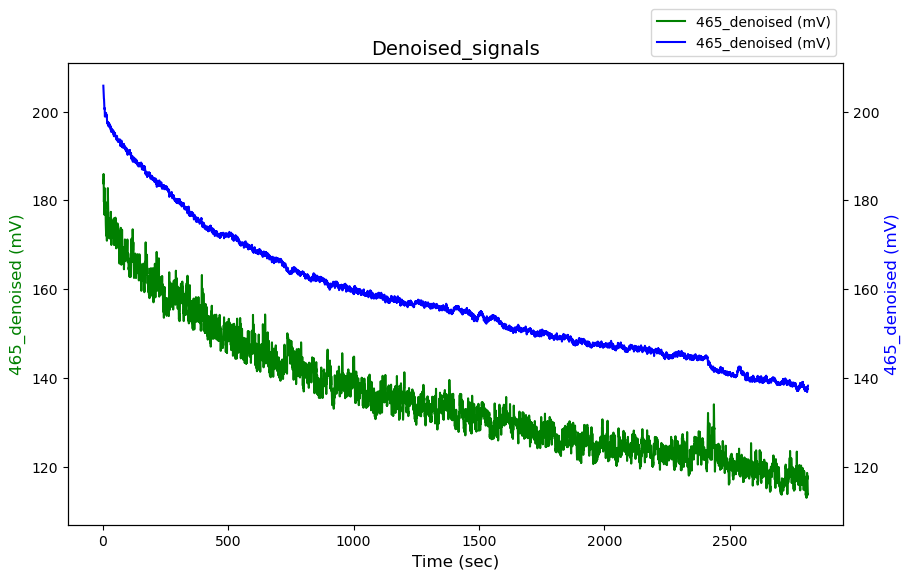

Slope    : -0.098
R-squared: 0.001


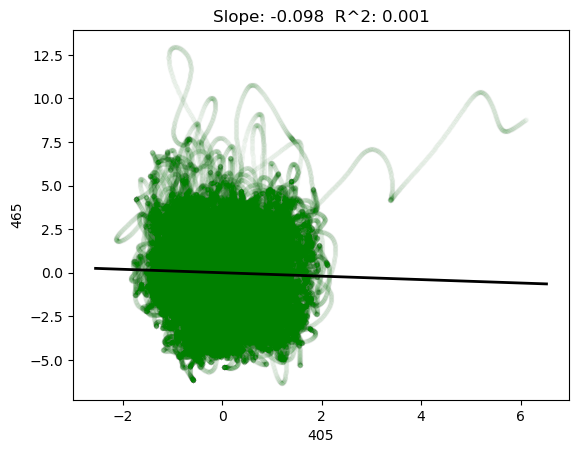

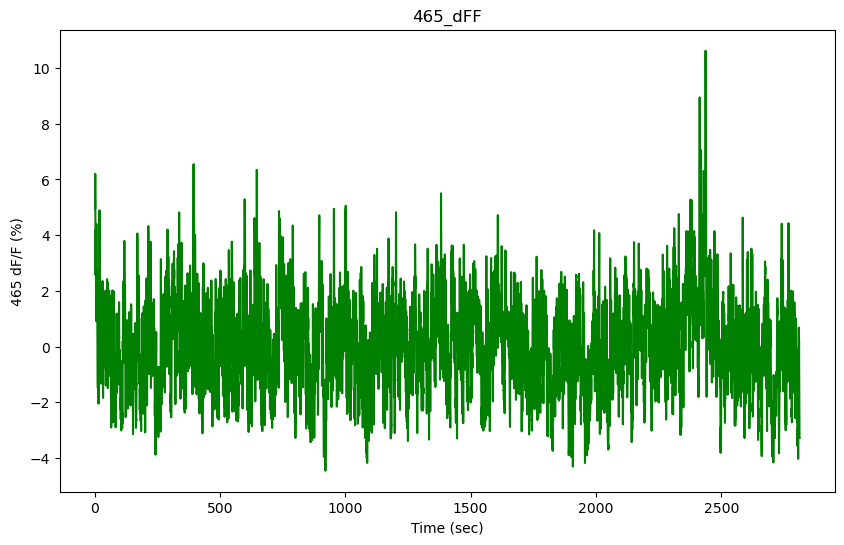

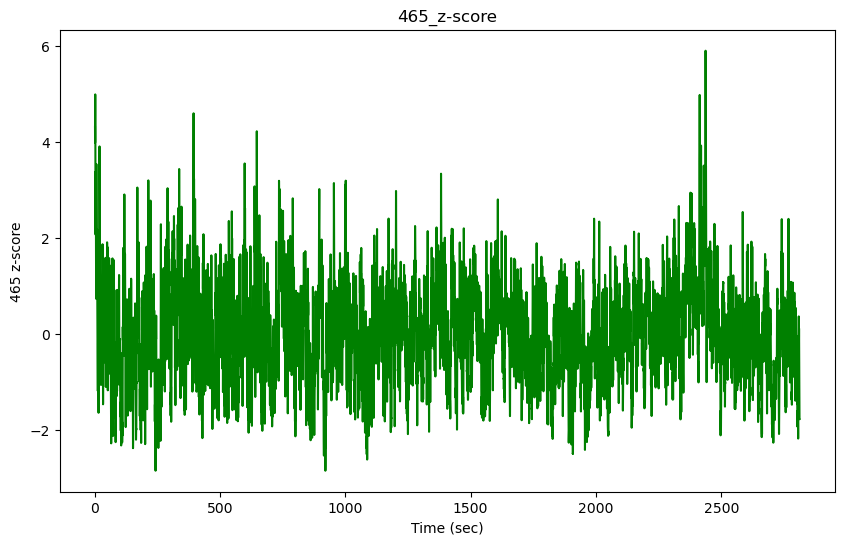

In [4]:
for i, folder in enumerate(Datafolder_list):
                TDT_Tanks_path = os.path.join(Raw_data_path, Recorded_date, folder)
                FPFunctions.FP_preprocessing_1ch(Tank_path=TDT_Tanks_path,
                                Dest_folder = os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0],'Preprocessing'), 
                                Use_CamTick=False,
                                FPS=25, 
                                Rec_duration=600)
                
                image_paths = [os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Raw_signal_465.png'),
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Denoised_signals.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_405_465_correlation.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_465_dFF.png')]

                comments = ["Figure1. Raw signals",
                            "Figure2. Denoised signals",
                            "Figure3. Correlation between 405 and 465",
                            "Figure4. 465 dFF"]

                ReportGeneration.FP_preprocessing(output_path=os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0]), 
                                                title=f'{Animal_ID_list[i]}_{session_list[0]}', 
                                                image_paths=image_paths, 
                                                comments=comments)

### 2. Peak Analysis for FP signals

In [5]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function

In [9]:
root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6"
sub_folder_list = FileFunctions.Grab_folder_names_in_folder(root_folder)
sub_folder_list1 = ['PI'] #The list of session names
print(sub_folder_list)

['B6_G10_002', 'B6_G10_004']


Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_002\PI already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_002\PI.
389 possible peaks detected in the signal
46 peaks detected with amplitude threshold


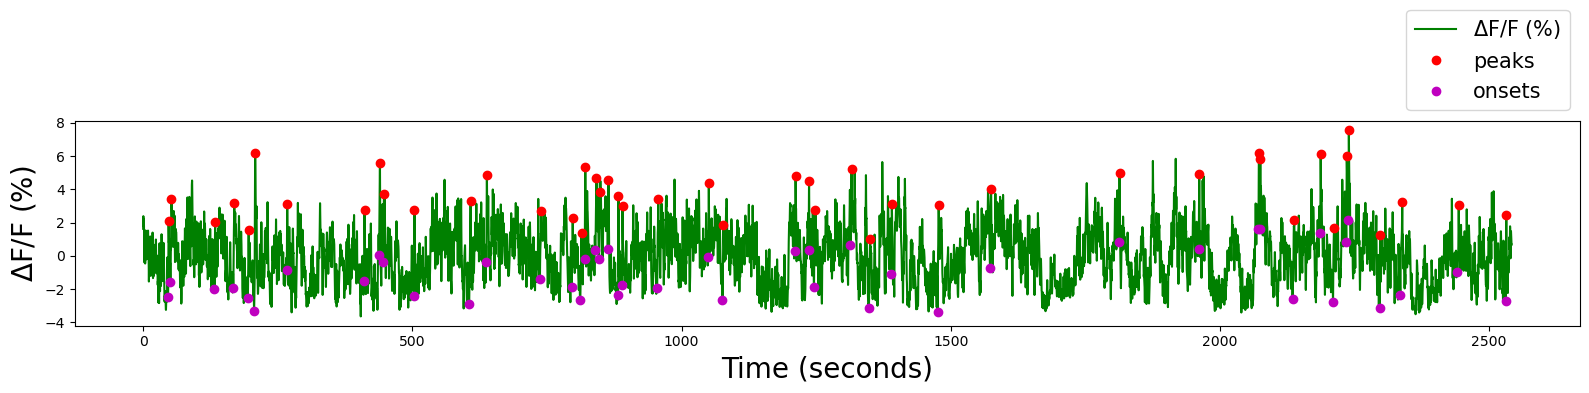

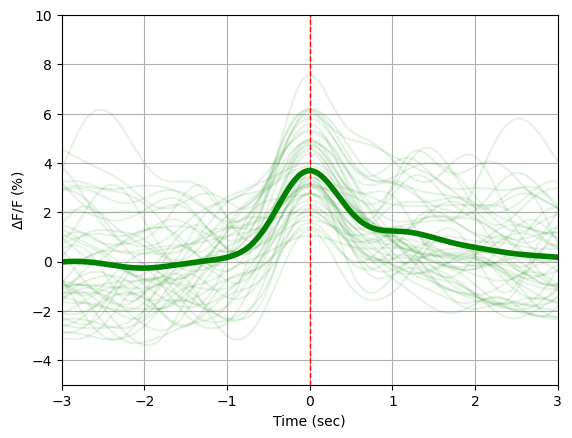

Number of peaks detected: 46
Mean amplitude of peaks: 4.801982256533167
Mean latency of peaks: 1.6233195640553637
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_004\PI already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250224_B6\B6_G10_004\PI.
433 possible peaks detected in the signal
66 peaks detected with amplitude threshold


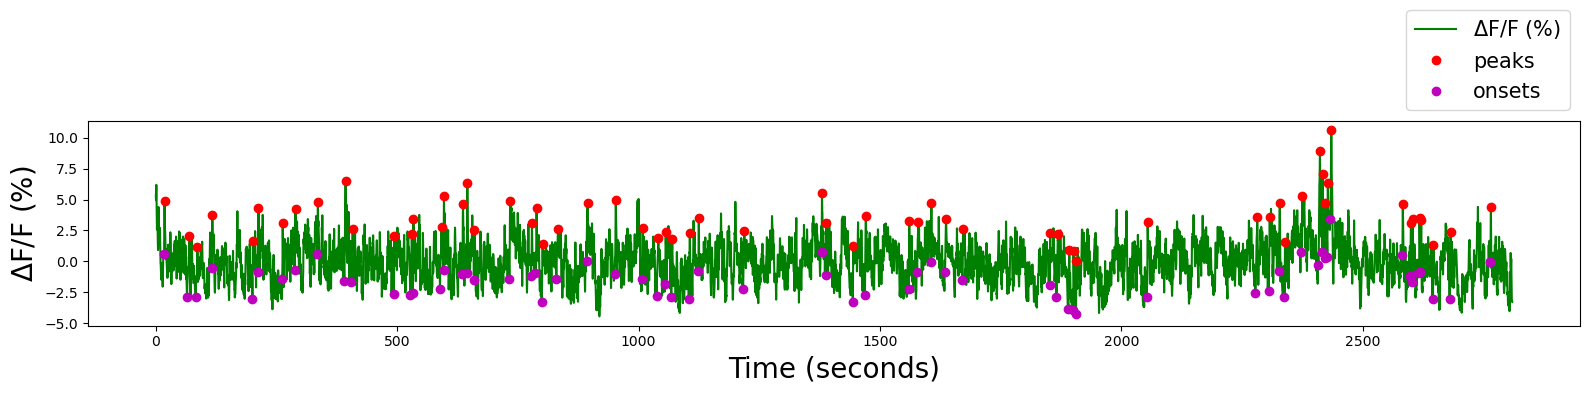

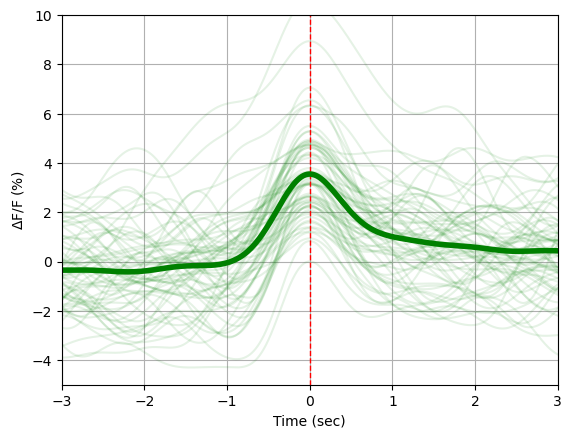

Number of peaks detected: 66
Mean amplitude of peaks: 5.043239278400844
Mean latency of peaks: 1.8560837446964857


: 

In [ ]:
for sub_folder in sub_folder_list:
    for sub_folder1 in sub_folder_list1:
        destfolder = os.path.join(root_folder, sub_folder, sub_folder1)
        FileFunctions.Set_WD(destfolder)
        FPFunctions.Peak_Analysis(pkl_path=os.path.join(destfolder, 'Preprocessing', 'Final_table_raw_trace.pkl'), 
                                prominence_thres= 2, 
                                amplitude_thres= 4,
                                FPS= 25, 
                                pre_window_len= 3, 
                                post_window_len= 3, 
                                SavePlots = False, 
                                SaveData = False, 
                                SaveVideos= False,
                                video_path=os.path.join(destfolder, f'{sub_folder}_{sub_folder1}.avi'))
        # VideoFunctions.Generate_montage(input_folder=os.path.join(destfolder, 'Peak_Analysis', 'spike_detection'),
        #                                 output_filename='Motatge_spikes.mp4',
        #                                 rows=3,
        #                                 cols=5,
        #                                 frame_rate=25,
        #                                 duration=6,
        #                                 codec='mp4v',
        #                                 popups=[('Firing', 3 , 2)],
        #                                 scale_factor = 0.5) 

### 3. Epoch Analysis

In [ ]:
import FileFunctions
import FPFunctions
import os

root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData"
Batch_folder = '241211_B6'
Animal_ID = 'B6_M_G06_001'
Session = 'SE'

FileFunctions.Set_WD(os.path.join(root_folder, Batch_folder, Animal_ID, Session))

FPFunctions.Epoch_Analysis_3EVT(pkl_path=os.path.join(root_folder, Batch_folder, Animal_ID, Session, 'Preprocessing', 'Final_table_raw_trace.pkl'),
                        evt_path='Data_DLC_30.csv',
                        FPS=25,
                        Rec_duration=594,
                        SavePlots=False,
                        SaveData=False,
                        PRE_TIME=2,
                        POST_TIME=5)

In [ ]:
root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData"
Batch_folder = '241211_B6'
Animal_ID = 'B6_M_G07_005'
Session = 'EE'

FileFunctions.Set_WD(os.path.join(root_folder, Batch_folder, Animal_ID, Session))

FPFunctions.Epoch_Analysis_2EVT(pkl_path=os.path.join(root_folder, Batch_folder, Animal_ID, Session, 'Preprocessing', 'Final_table_raw_trace.pkl'),
                        evt_path='Data_DLC.csv',
                        FPS=25,
                        Rec_duration=600,
                        SavePlots=True,
                        SaveData=True,
                        PRE_TIME=2,
                        POST_TIME=5)